In [9]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')

print('Column names:', data.columns)

print('No. of rows, columns:', data.shape)

nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')
No. of rows, columns: (396872, 68)
Unique number of countries: 266


In [12]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

print('Debt description:')
print(central_govt_debt['2022'].describe())

print('Expences description:')
print(military_exp['2022'].describe())

Shape of central_govt_debt: (266, 68)
Shape of military_exp: (266, 68)
Debt description:
count     13.000000
mean      67.569196
std       27.035236
min       34.521318
25%       43.322740
50%       61.417864
75%       83.682042
max      115.696632
Name: 2022, dtype: float64
Expences description:
count    195.000000
mean       2.000927
std        2.586828
min        0.069184
25%        1.049801
50%        1.508123
75%        2.278115
max       33.546573
Name: 2022, dtype: float64


Text(0.5, 1.0, 'Military expenditure (% of GDP) of 13 countries in 2022')

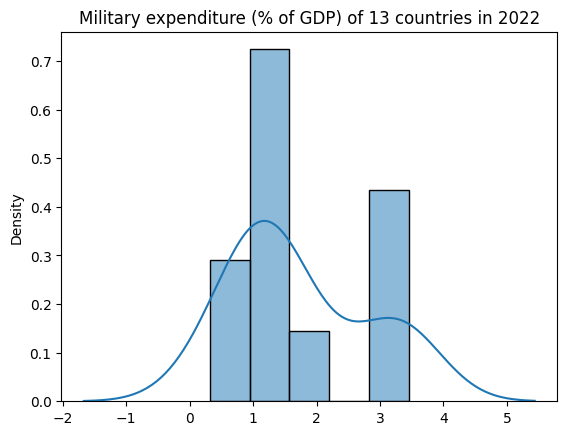

In [10]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_2022 = central_govt_debt['2022'].loc[~pd.isnull(central_govt_debt['2022'])]
military_exp_2022 = military_exp['2022'].loc[~pd.isnull(military_exp['2022'])]
data_to_plot = pd.concat((central_govt_debt_2022, military_exp_2022), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]
#data_to_plot.head()

import numpy as np
# from matplotlib import pyplot as plt
import seaborn as sns

# plt.figure(figsize=(5.5, 5.5))
# g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g = sns.histplot(np.array(data_to_plot.military_exp), kde=True, stat="density", kde_kws=dict(cut=3))
g.set_title('Military expenditure (% of GDP) of 13 countries in 2022')

Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2022')

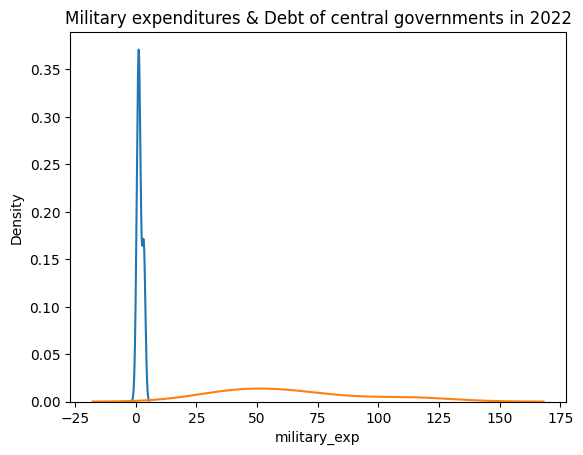

In [13]:
# plt.figure(figsize=(5.5, 5.5))
# g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g = sns.kdeplot(data_to_plot.military_exp)
sns.kdeplot(data_to_plot.central_govt_debt, ax=g)
g.set_title('Military expenditures & Debt of central governments in 2022')

Shape of data_us: (34, 2)


<Axes: title={'center': 'USA Debt of Federal Government during 1988-2023 (% of GDP)'}>

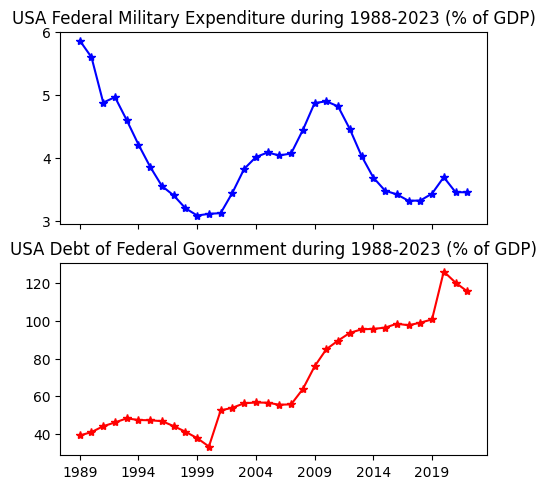

In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2023')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
#data_us.head(10)

data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

# Two subplots, the axes array is 1-d
from matplotlib import pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('USA Federal Military Expenditure during 1988-2023 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('USA Debt of Federal Government during 1988-2023 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

Shape of data_us: (15, 2)


<Axes: title={'center': 'UA Debt of Federal Government during 1988-2023 (% of GDP)'}>

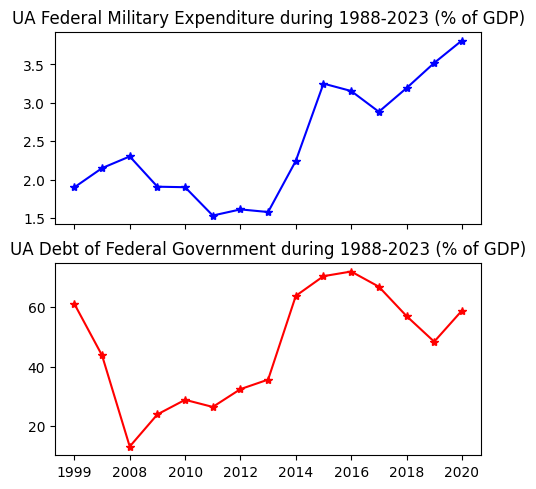

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='UKR', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='UKR', :].T

data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2023')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
#data_us.head(10)

data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

# Two subplots, the axes array is 1-d
from matplotlib import pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('UA Federal Military Expenditure during 1988-2023 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('UA Debt of Federal Government during 1988-2023 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

Shape of data_us: (22, 2)


<Axes: title={'center': 'RUS Debt of Federal Government during 1988-2023 (% of GDP)'}>

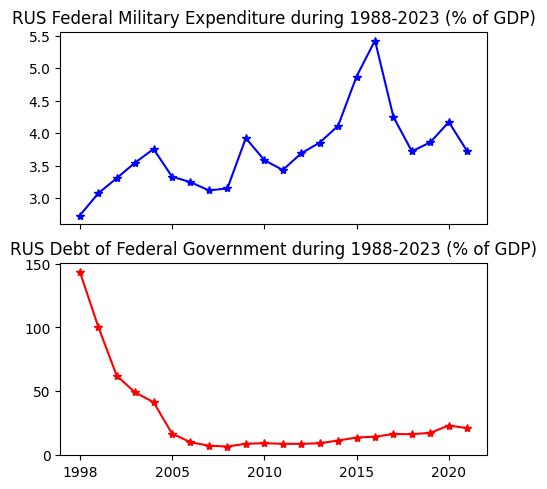

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='RUS', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='RUS', :].T

data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2023')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
#data_us.head(10)

data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

# Two subplots, the axes array is 1-d
from matplotlib import pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('RUS Federal Military Expenditure during 1988-2023 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('RUS Debt of Federal Government during 1988-2023 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

Text(0.5, 0, 'Years')

<Figure size 550x550 with 0 Axes>

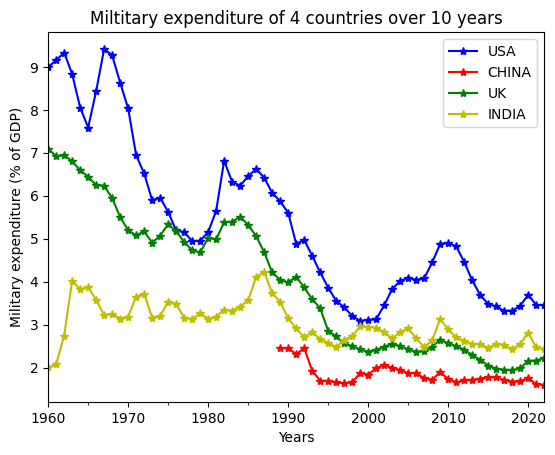

In [39]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')
#data.index = data['Country Code']

chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='CHN')].T

index0 = np.where(chn.index=='1960')[0][0]
index1 = np.where(chn.index=='2023')[0][0]

chn = chn.iloc[index0:index1+1, :]
chn.index = pd.to_datetime(chn.index)
chn.dropna(inplace=True)

usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='USA')].T
usa = usa.iloc[index0:index1+1,:]
usa.index = pd.to_datetime(usa.index)
usa.dropna(inplace=True)

ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='IND')].T
ind = ind.iloc[index0:index1+1,:]
ind.index = pd.to_datetime(ind.index)
ind.dropna(inplace=True)

gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='GBR')].T
gbr = gbr.iloc[index0:index1+1,:]
gbr.index = pd.to_datetime(gbr.index)
gbr.dropna(inplace=True)

plt.figure(figsize=(5.5, 5.5))
ax = usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r', ax=ax)
gbr.plot(linestyle='-', marker='*', color='g', ax=ax)
ind.plot(linestyle='-', marker='*', color='y', ax=ax)
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 4 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

<Figure size 550x550 with 0 Axes>

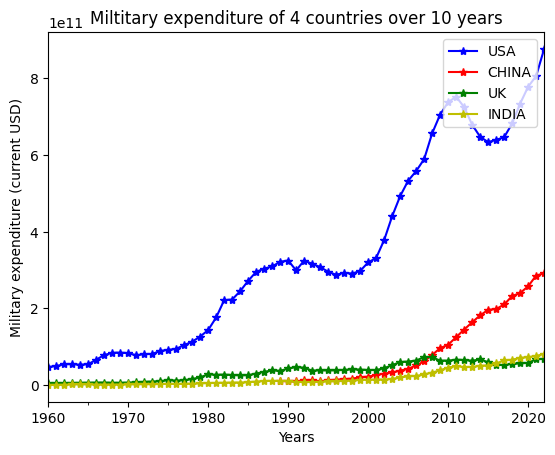

In [40]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')
#data.index = data['Country Code']

chn = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='CHN')].T

index0 = np.where(chn.index=='1960')[0][0]
index1 = np.where(chn.index=='2023')[0][0]

chn = chn.iloc[index0:index1+1, :]
chn.index = pd.to_datetime(chn.index)
chn.dropna(inplace=True)

usa = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='USA')].T
usa = usa.iloc[index0:index1+1,:]
usa.index = pd.to_datetime(usa.index)
usa.dropna(inplace=True)

ind = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='IND')].T
ind = ind.iloc[index0:index1+1,:]
ind.index = pd.to_datetime(ind.index)
ind.dropna(inplace=True)

gbr = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='GBR')].T
gbr = gbr.iloc[index0:index1+1,:]
gbr.index = pd.to_datetime(gbr.index)
gbr.dropna(inplace=True)

plt.figure(figsize=(5.5, 5.5))
ax = usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r', ax=ax)
gbr.plot(linestyle='-', marker='*', color='g', ax=ax)
ind.plot(linestyle='-', marker='*', color='y', ax=ax)
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 4 countries over 10 years')
plt.ylabel('Military expenditure (current USD)')
plt.xlabel('Years')